In [1]:
#from models.dnnlib import tflib as tflib
#from models import dnnlib

import sys
sys.path.insert(0,"./models")

import dnnlib.tflib as tflib
import dnnlib

import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Silence deprecation warnings from TensorFlow 1.13 onwards
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

In [3]:
tflib.init_tf()
#pkl_ = "./models/pretrained/stylegan2-car-config-f.pkl"
pkl_ = './models/pretrained/stylegan2-ffhq-config-f.pkl'
with open(pkl_, 'rb') as f:
    _G, _D, Gs = pickle.load(f)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [4]:
# Pick latent vector.
rnd = np.random.RandomState(4)
latents = rnd.randn(1, Gs.input_shape[1])

In [5]:
print('input_shape:', Gs.input_shape)

input_shape: [None, 512]


In [6]:
Gs.get_var('dlatent_avg').shape

(512,)

In [7]:
np.random.RandomState(0).randn(*Gs.input_shape[1:]).shape

(512,)

In [8]:
z = np.stack([np.random.RandomState(0).randn(*Gs.input_shape[1:])])

w = Gs.components.mapping.run(z, None)

In [9]:
w.shape

(1, 18, 512)

In [10]:
w[0].transpose
for i in w[0]:
    print(i)

[ 1.94140226e-01 -1.38042912e-01  1.15719736e+00  3.17493975e-02
  1.87435225e-01 -4.08742100e-01 -1.04232095e-01 -1.64216727e-01
  5.13037324e-01 -8.82741809e-02 -2.48975068e-01 -3.55964601e-02
 -1.08115293e-01 -1.86024979e-01  2.59486347e-01 -2.29651660e-01
 -9.03503746e-02  7.69350410e-01 -3.65682244e-02 -2.95891147e-02
 -3.13627154e-01  5.53291440e-01  2.16542542e-01 -1.78547427e-01
  3.99815589e-01  1.47667241e+00 -8.07690397e-02 -1.81690514e-01
  8.20515901e-02  1.64882076e+00 -5.03828637e-02 -5.40213995e-02
 -3.81774157e-02 -2.09690612e-02  5.01737714e-01 -1.18783206e-01
 -1.00790627e-01 -1.12480782e-01 -8.26392025e-02  2.81902224e-01
 -8.04489926e-02  5.36065519e-01 -1.10059224e-01 -5.39277680e-02
  8.36177468e-01 -2.74447918e-01  8.84601474e-01 -3.61790180e-01
 -1.24679103e-01 -2.04281479e-01  1.23712838e+00  5.49411178e-01
  4.36762482e-01 -1.03189303e-02 -1.96367875e-01 -2.47671023e-01
 -5.80243766e-02 -3.50813121e-02 -2.29287326e-01 -1.90850813e-02
  7.94024289e-01  5.12793

In [11]:
Gs_syn_kwargs = dnnlib.EasyDict()
Gs_syn_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_syn_kwargs.randomize_noise = False
Gs_syn_kwargs.minibatch_size = 4

# generating images
all_images = Gs.components.synthesis.run(w, **Gs_syn_kwargs)

In [12]:
all_images[0].shape

(1024, 1024, 3)

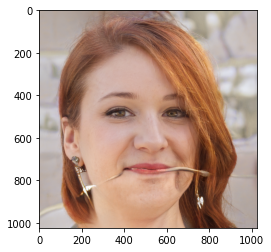

In [13]:
import matplotlib.pyplot as plt
plt.imshow(all_images[0])

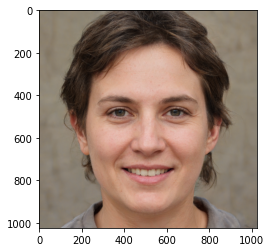

In [15]:
# displaying avg image
avg_image = Gs.components.synthesis.run((w + Gs.get_var('dlatent_avg') - w), **Gs_syn_kwargs)[0]
plt.imshow(avg_image)


In [19]:
#test image
test_w = [Gs.get_var('dlatent_avg') for i in range(18)]
test_w = np.array(test_w)
test_img = Gs.components.synthesis.run(test_w)


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: In[0] and In[1] has different ndims: [18] vs. [512,512]
	 [[node G_synthesis_1/_Run/G_synthesis_1/4x4/Conv/MatMul (defined at <string>:47) ]]
	 [[G_synthesis_1/_Run/G_synthesis_1/images_out/_1461]]
  (1) Invalid argument: In[0] and In[1] has different ndims: [18] vs. [512,512]
	 [[node G_synthesis_1/_Run/G_synthesis_1/4x4/Conv/MatMul (defined at <string>:47) ]]
0 successful operations.
0 derived errors ignored.

Errors may have originated from an input operation.
Input Source operations connected to node G_synthesis_1/_Run/G_synthesis_1/4x4/Conv/MatMul:
 G_synthesis_1/_Run/G_synthesis_1/4x4/Conv/strided_slice (defined at <string>:456)	
 G_synthesis_1/_Run/G_synthesis_1/4x4/Conv/mul_1 (defined at <string>:37)

Input Source operations connected to node G_synthesis_1/_Run/G_synthesis_1/4x4/Conv/MatMul:
 G_synthesis_1/_Run/G_synthesis_1/4x4/Conv/strided_slice (defined at <string>:456)	
 G_synthesis_1/_Run/G_synthesis_1/4x4/Conv/mul_1 (defined at <string>:37)

Original stack trace for 'G_synthesis_1/_Run/G_synthesis_1/4x4/Conv/MatMul':
  File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/codebunny/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/codebunny/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/home/codebunny/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 619, in start
    self.io_loop.start()
  File "/home/codebunny/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
    self._run_once()
  File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
    handle._run()
  File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/home/codebunny/.local/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/codebunny/.local/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/home/codebunny/.local/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "/home/codebunny/.local/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "/home/codebunny/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 358, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/codebunny/.local/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/home/codebunny/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/codebunny/.local/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/home/codebunny/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 536, in execute_request
    self.do_execute(
  File "/home/codebunny/.local/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/home/codebunny/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 302, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/codebunny/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 539, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/codebunny/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2898, in run_cell
    result = self._run_cell(
  File "/home/codebunny/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "/home/codebunny/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/codebunny/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3169, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/codebunny/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/codebunny/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-7b88731bd0a4>", line 4, in <module>
    test_img = Gs.components.synthesis.run(test_w)
  File "/home/codebunny/github/Slider-based-Control-GAN/./models/dnnlib/tflib/network.py", line 423, in run
    out_gpu = net_gpu.get_output_for(*in_gpu, return_as_list=True, **dynamic_kwargs)
  File "/home/codebunny/github/Slider-based-Control-GAN/./models/dnnlib/tflib/network.py", line 221, in get_output_for
    out_expr = self._build_func(*final_inputs, **build_kwargs)
  File "<string>", line 492, in G_synthesis_stylegan2
  File "<string>", line 456, in layer
  File "<string>", line 99, in modulated_conv2d_layer
  File "<string>", line 47, in dense_layer
  File "/home/codebunny/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "/home/codebunny/.local/lib/python3.8/site-packages/tensorflow/python/ops/math_ops.py", line 3489, in matmul
    return gen_math_ops.mat_mul(
  File "/home/codebunny/.local/lib/python3.8/site-packages/tensorflow/python/ops/gen_math_ops.py", line 5716, in mat_mul
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "/home/codebunny/.local/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "/home/codebunny/.local/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 3557, in _create_op_internal
    ret = Operation(
  File "/home/codebunny/.local/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 2045, in __init__
    self._traceback = tf_stack.extract_stack_for_node(self._c_op)
